In [0]:
import numpy as np
import keras
import re
import os

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ls


gdrive/  sample_data/


In [0]:
cd gdrive/


/content/gdrive


In [0]:
ls


'My Drive'/


In [0]:
cd My\ Drive/spamfinaldataset/

/content/gdrive/My Drive/spamfinaldataset


In [0]:
ls

ham/  spam/


In [0]:
X = []
Y = []
i = 0

for filename in os.listdir(r'ham/'):
    path = "ham"+"/" + filename
    file = open(path,errors='ignore')
    data = file.read()
#     if(type(re.search('Content(.*\n)*',data))!='NoneType'):
#         dat = re.search('Content(.*\n)*',data)
#         if dat is not None:
#             dat = dat.group()
    X.append(data)
    Y.append('ham')
    i=i+1
    if(i%100==0):
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900


In [0]:
print(len(X))

6951


In [0]:

for filename in os.listdir(r'spam/'):
    path = "spam"+"/" + filename
    file = open(path,errors='ignore')
    data = file.read()
#     if(type(re.search('Content(.*\n)*',data))!='NoneType'):
#         dat = re.search('Content(.*\n)*',data)
#         if dat is not None:
#             dat = dat.group()
    X.append(data)
    Y.append('spam')
    i=i+1
    if(i%100==0):
        print(i)

7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300


In [0]:
print(len(X))
print(X[2])
print(Y[2])

9350
From spamassassin-talk-admin@lists.sourceforge.net  Thu Sep 12 21:09:40 2002
Return-Path: <spamassassin-talk-admin@example.sourceforge.net>
Delivered-To: yyyy@localhost.example.com
Received: from localhost (jalapeno [127.0.0.1])
	by jmason.org (Postfix) with ESMTP id 37B3D16F03
	for <jm@localhost>; Thu, 12 Sep 2002 21:09:39 +0100 (IST)
Received: from jalapeno [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Thu, 12 Sep 2002 21:09:39 +0100 (IST)
Received: from usw-sf-list2.sourceforge.net (usw-sf-fw2.sourceforge.net
    [216.136.171.252]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id
    g8CIqkC11377 for <jm-sa@jmason.org>; Thu, 12 Sep 2002 19:52:46 +0100
Received: from usw-sf-list1-b.sourceforge.net ([10.3.1.13]
    helo=usw-sf-list1.sourceforge.net) by usw-sf-list2.sourceforge.net with
    esmtp (Exim 3.31-VA-mm2 #1 (Debian)) id 17pZ3T-0004Ps-00; Thu,
    12 Sep 2002 11:51:07 -0700
Received: from smtpzilla1.xs4all.nl ([194.109.127.137]

In [0]:
# Save dict pickle
import pickle

print("Saving X.pickle")
with open('X.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('X.pickle saved')
print("Saving Y.pickle")
with open('Y.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('Y.pickle saved')


Saving X.pickle
X.pickle saved
Saving Y.pickle
Y.pickle saved


In [0]:
if(os.path.isfile('X.pickle')):
    with open('X.pickle', 'rb') as handle:
        X = pickle.load(handle)
if(os.path.isfile('Y.pickle')):
    with open('Y.pickle', 'rb') as handle:
        Y = pickle.load(handle)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(min_df=1,stop_words='english')

In [0]:
cv

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [0]:
dfy = []
for i in Y:
  if(i=='ham'):
    dfy.append(1)
  else:
    dfy.append(0)
df_x = X
df_y = dfy

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20)

In [0]:
X_train = cv.fit_transform(X_train)

In [0]:
X_train.shape

(7480, 162385)

In [0]:
X_test = cv.transform(X_test)

In [0]:
X_test.shape

(1870, 162385)

In [0]:
print(y_train)

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 

In [0]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(criterion='gini')
classifier1.fit(X_train,y_train)
predRF=classifier1.predict(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predRF)))
print('Precision score: {}'.format(precision_score(y_test, predRF)))
print('Recall score: {}'.format(recall_score(y_test, predRF)))
print('F1 score: {}'.format(f1_score(y_test, predRF)))

Accuracy score: 0.9877005347593583
Precision score: 0.9933234421364985
Recall score: 0.9896526237989652
F1 score: 0.9914846353202518


In [0]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
error_rate_train = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate_train.append(np.mean(pred_i != y_train))
    
error_rate_test = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate_test.append(np.mean(pred_i != y_test))
    

Text(0,0.5,'Error Rate')

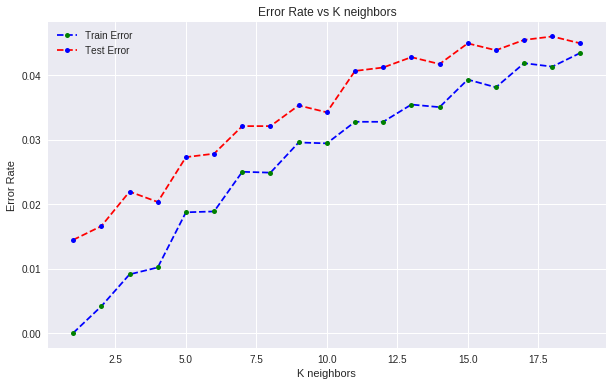

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20),error_rate_test,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Error","Test Error"])
plt.title('Error Rate vs K neighbors')
plt.xlabel('K neighbors')
plt.ylabel('Error Rate')

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9898395721925134

In [0]:
y_pred=knn.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test, y_pred))

[[ 505   12]
 [   7 1346]]


In [0]:
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Precision score: 0.9911634756995582
Recall score: 0.9948263118994827
F1 score: 0.9929915160457395


In [0]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
lg.score(X_test,y_test)

0.9759358288770054

In [0]:
y_pred=lg.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))

[[ 465   30]
 [  15 1360]]


In [0]:
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Precision score: 0.9784172661870504
Recall score: 0.9890909090909091
F1 score: 0.9837251356238699


In [0]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
error_rate_train = []
for i in range(1,20):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train,y_train)
    pred_i = dTree.predict(X_train)
    error_rate_train.append(np.mean(pred_i != y_train))
    
error_rate_test = []
for i in range(1,20):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train,y_train)
    pred_i = dTree.predict(X_test)
    error_rate_test.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

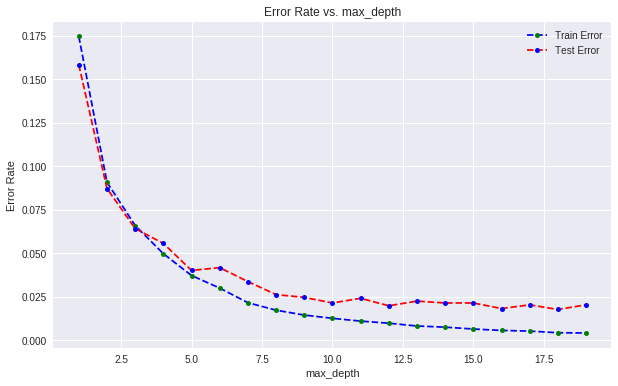

In [0]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20),error_rate_test,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Error","Test Error"])
plt.title('Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')

In [0]:
dTree = DecisionTreeClassifier(max_depth=12)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
dTree.score(X_test,y_test)

0.9786096256684492

In [0]:
y_pred=dTree.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))

[[ 489   28]
 [  12 1341]]


In [0]:
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Precision score: 0.9795471146822499
Recall score: 0.991130820399113
F1 score: 0.985304922850845


In [0]:
#Multinomail NB
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
mnb.score(X_test,y_test)

0.8657754010695187

In [0]:
y_pred=mnb.predict(X_test.toarray())

In [0]:
print(confusion_matrix(y_test, y_pred))

[[ 271  246]
 [   5 1348]]


In [0]:
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Precision score: 0.8456712672521958
Recall score: 0.9963045084996305
F1 score: 0.9148286392941974


In [0]:
#Linear SVM
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
svc.score(X_test,y_test)

0.9898395721925134

In [0]:
y_pred=svc.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))

[[ 483   12]
 [   7 1368]]


In [0]:
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Precision score: 0.991304347826087
Recall score: 0.9949090909090909
F1 score: 0.993103448275862


In [0]:
countspam=0
countham=0
for i in y_train:
  if(i==1):
    countham=countham+1
  else:
    countspam = countspam+1
print("Ham count in training: ",countham)
print("Spam count in training: ",countspam)

Ham count in training:  5576
Spam count in training:  1904


In [0]:
countspam=0
countham=0
for i in y_test:
  if(i==1):
    countham=countham+1
  else:
    countspam = countspam+1
print("Ham count in testing: ",countham)
print("Spam count in testing: ",countspam)

Ham count in testing:  1375
Spam count in testing:  495


In [0]:
#RNN
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
if(os.path.isfile('X.pickle')):
    with open('X.pickle', 'rb') as handle:
        X = pickle.load(handle)

In [0]:
if(os.path.isfile('Y.pickle')):
    with open('Y.pickle', 'rb') as handle:
        Y = pickle.load(handle)

In [0]:
print(X[2])
print(Y[2])

From spamassassin-talk-admin@lists.sourceforge.net  Thu Sep 12 21:09:40 2002
Return-Path: <spamassassin-talk-admin@example.sourceforge.net>
Delivered-To: yyyy@localhost.example.com
Received: from localhost (jalapeno [127.0.0.1])
	by jmason.org (Postfix) with ESMTP id 37B3D16F03
	for <jm@localhost>; Thu, 12 Sep 2002 21:09:39 +0100 (IST)
Received: from jalapeno [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Thu, 12 Sep 2002 21:09:39 +0100 (IST)
Received: from usw-sf-list2.sourceforge.net (usw-sf-fw2.sourceforge.net
    [216.136.171.252]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id
    g8CIqkC11377 for <jm-sa@jmason.org>; Thu, 12 Sep 2002 19:52:46 +0100
Received: from usw-sf-list1-b.sourceforge.net ([10.3.1.13]
    helo=usw-sf-list1.sourceforge.net) by usw-sf-list2.sourceforge.net with
    esmtp (Exim 3.31-VA-mm2 #1 (Debian)) id 17pZ3T-0004Ps-00; Thu,
    12 Sep 2002 11:51:07 -0700
Received: from smtpzilla1.xs4all.nl ([194.109.127.137]) by


In [0]:
num_words = 20000
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

max_length_of_text = 1000
X = pad_sequences(X, maxlen=max_length_of_text)

Found 181974 unique tokens.


In [0]:
y = Y
print(y)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

print(y.shape)
print(y)

['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'

In [0]:
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, Input, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7480, 1000) (7480, 2)
(1870, 1000) (1870, 2)


In [0]:
embed_dim = 64
lstm_out = 128
batch_size = 64

inputs = Input((max_length_of_text, ))
x = Embedding(num_words, embed_dim)(inputs)
x = LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(2,activation='sigmoid')(x)
model = Model(inputs, x)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1000, 64)          1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 1,379,074
Trainable params: 1,379,074
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size = batch_size, epochs = 3, validation_split = 0.1)

Train on 6732 samples, validate on 748 samples
Epoch 1/3
6732/6732 [==============================] - 222s 33ms/step - loss: 0.2524 - acc: 0.9018 - val_loss: 0.1112 - val_acc: 0.9592
Epoch 2/3
6732/6732 [==============================] - 220s 33ms/step - loss: 0.0462 - acc: 0.9854 - val_loss: 0.0936 - val_acc: 0.9686
Epoch 3/3
6732/6732 [==============================] - 221s 33ms/step - loss: 0.0258 - acc: 0.9931 - val_loss: 0.0456 - val_acc: 0.9906


In [0]:
y_pred = model.predict(X_test)